# Iris: ROC curve and cutoff value
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [8]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn

     |████████████████████████████████| 6.9 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 26.9 MB 5.8 MB/s eta 0:00:01     |████████████████▍               | 13.8 MB 9.0 MB/s eta 0:00:02
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=847cc9acf4b84240f39f210e685ab9a4e5a2a4450c7d6c88923edd0a19031fd5
  Stored in directory: /Users/swagatsarma/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
import math

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [11]:
data=pd.read_csv('/Users/swagatsarma/teach/archive/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
data.groupby('Species').count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [15]:
data2=pd.get_dummies(data, columns=['Species'])
data2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


In [16]:
data2.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species_Iris-setosa', 'Species_Iris-versicolor',
       'Species_Iris-virginica'],
      dtype='object')

In [17]:
X=data2.drop(['Id','Species_Iris-setosa', 'Species_Iris-versicolor','Species_Iris-virginica'],axis=1)
y=data2[['Species_Iris-setosa', 'Species_Iris-versicolor','Species_Iris-virginica']]
Name=[ 'Species_Iris-setosa', 'Species_Iris-versicolor','Species_Iris-virginica']
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

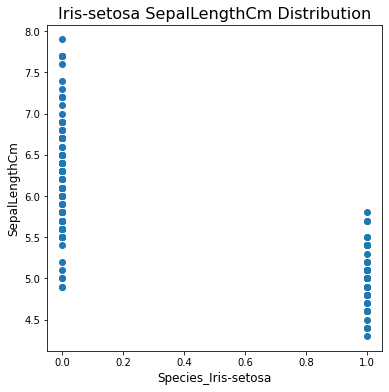

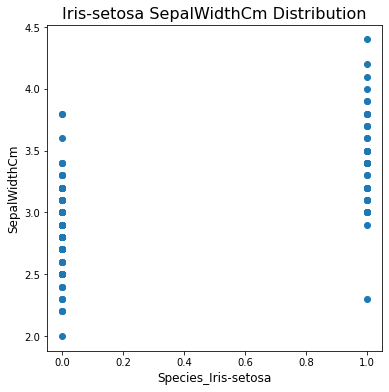

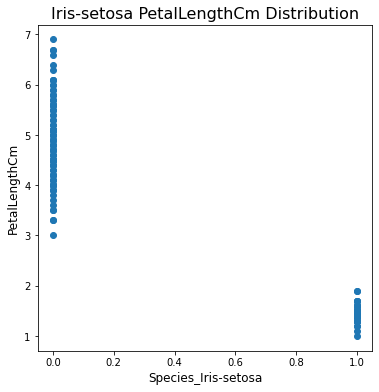

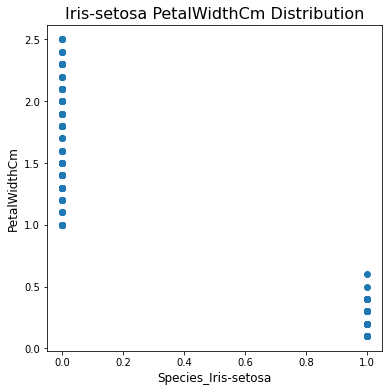

In [18]:
for i in range(4):
    item=cols[i]
    fig,ax = plt.subplots(figsize=(6,6))
    ax.set_title('Iris-setosa '+item+' Distribution',fontsize=16)
    ax.set_xlabel('Species_Iris-setosa',fontsize=12)
    ax.set_ylabel(item,fontsize=12)
    ax.scatter(data2['Species_Iris-setosa'],data2[item])

# Create ROC curve for Species_Iris-setosa

# A. ROC curve by OneVsRestClassifier

In [19]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [20]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [21]:
y_test=np.array(y_test)

In [22]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
th = dict()
roc_auc = dict()
n_classes=3

for i in range(n_classes):
    fpr[i], tpr[i], th[i] = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [23]:
iris0=pd.DataFrame(columns=['fpr','tpr','th'])
iris0['fpr']=fpr[0]
iris0['tpr']=tpr[0]
iris0['th']=th[0]
iris0

,fpr,tpr,th
0,0.000000,0.000000,1.379896
1,0.000000,0.047619,0.379896
2,0.000000,0.142857,0.249760
3,0.018519,0.142857,0.195970
4,0.018519,0.190476,0.188747
5,0.037037,0.190476,0.175841
6,0.037037,0.285714,0.126880
7,0.055556,0.285714,0.121416
8,0.055556,0.380952,0.099731
9,0.074074,0.380952,0.068817


In [24]:
iris0['dist']=iris0['fpr']**2+(1-iris0['tpr'])**2
iris0

,fpr,tpr,th,dist
0,0.000000,0.000000,1.379896,1.000000
1,0.000000,0.047619,0.379896,0.907029
2,0.000000,0.142857,0.249760,0.734694
3,0.018519,0.142857,0.195970,0.735037
4,0.018519,0.190476,0.188747,0.655672
5,0.037037,0.190476,0.175841,0.656701
6,0.037037,0.285714,0.126880,0.511576
7,0.055556,0.285714,0.121416,0.513291
8,0.055556,0.380952,0.099731,0.386306
9,0.074074,0.380952,0.068817,0.388707


In [25]:
iris0[iris0['dist']==iris0['dist'].min()]
# cutoff value of thresholds = -0.110889

,fpr,tpr,th,dist
16,0.148148,0.904762,-0.110889,0.031018


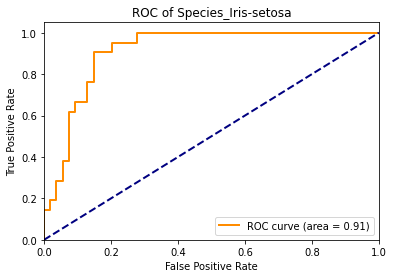

In [26]:
plt.figure()
lw = 2
plt.plot(
    fpr[0],tpr[0],color="darkorange",lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC of ' + Name[0])
plt.legend(loc="lower right")
plt.show()

# B. Manual ROC curve

In [27]:
data2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


## 1.SepalLengthCm

In [28]:
data3a=data2[['SepalLengthCm','Species_Iris-setosa']]
data3a=data3a.sort_values('SepalLengthCm').reset_index(drop=True)
irism1=pd.DataFrame(columns=['fpr','tpr','th'])
th1=list(range(1,100))
irism1['th']=th1
irism1['th']=irism1['th']/10
len(irism1)

99

In [29]:
for i in range(99):
    s=irism1.loc[i,'th']
    tp=len(data3a[data3a['SepalLengthCm']<=s][data3a['Species_Iris-setosa']==1])
    fn=len(data3a[data3a['SepalLengthCm']<=s][data3a['Species_Iris-setosa']==0])
    fp=len(data3a[data3a['SepalLengthCm']>s][data3a['Species_Iris-setosa']==1])
    tn=len(data3a[data3a['SepalLengthCm']>s][data3a['Species_Iris-setosa']==0])
    if fp+tn!=0 and tp+fn!=0:
        irism1.loc[i,'fpr']=fp/(fp+tn)
        irism1.loc[i,'tpr']=tp/(tp+fn)
irism1=irism1.fillna('N')        
irism1=irism1[irism1['fpr']!='N'][irism1['tpr']!='N']
irism1

/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/2556390410.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tp=len(data3a[data3a['SepalLengthCm']<=s][data3a['Species_Iris-setosa']==1])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/2556390410.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fn=len(data3a[data3a['SepalLengthCm']<=s][data3a['Species_Iris-setosa']==0])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/2556390410.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fp=len(data3a[data3a['SepalLengthCm']>s][data3a['Species_Iris-setosa']==1])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/2556390410.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tn=len(data3a[data3a['SepalLengthCm']>s][data3a['Species_Iris-setosa']==0])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipyke

,fpr,tpr,th
42,0.328859,1.0,4.3
43,0.315068,1.0,4.4
44,0.310345,1.0,4.5
45,0.29078,1.0,4.6
46,0.280576,1.0,4.7
47,0.253731,1.0,4.8
48,0.234375,0.909091,4.9
49,0.186441,0.875,5.0
50,0.12844,0.878049,5.1
51,0.104762,0.866667,5.2


In [30]:
irism1['dist']=irism1['fpr']**2+(1-irism1['tpr'])**2
irism1

,fpr,tpr,th,dist
42,0.328859,1.0,4.3,0.108148
43,0.315068,1.0,4.4,0.099268
44,0.310345,1.0,4.5,0.096314
45,0.29078,1.0,4.6,0.084553
46,0.280576,1.0,4.7,0.078723
47,0.253731,1.0,4.8,0.06438
48,0.234375,0.909091,4.9,0.063196
49,0.186441,0.875,5.0,0.050385
50,0.12844,0.878049,5.1,0.031369
51,0.104762,0.866667,5.2,0.028753


In [31]:
irism1[irism1['dist']==irism1['dist'].min()]
# cutoff value of SepalLengthCm = 5.4

,fpr,tpr,th,dist
53,0.05102,0.865385,5.4,0.020724


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


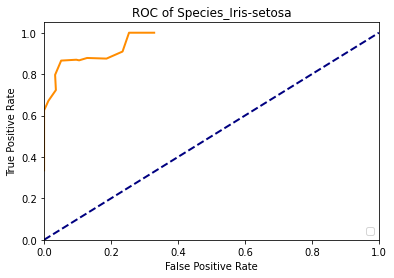

In [32]:
plt.figure()
lw = 2
plt.plot(
    irism1['fpr'],irism1['tpr'],color="darkorange",lw=lw,
    #label="ROC curve (area = %0.2f)" % irism1['th'],
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC of ' + Name[0])
plt.legend(loc="lower right")
plt.show()

## 2.SepalWidthCm

In [33]:
data3b=data2[['SepalWidthCm','Species_Iris-setosa']]
data3b=data3b.sort_values('SepalWidthCm').reset_index(drop=True)
irism2=pd.DataFrame(columns=['fpr','tpr','th'])
th2=list(range(1,100))
irism2['th']=th2
irism2['th']=irism2['th']/10
len(irism2)

99

In [34]:
for i in range(99):
    s=irism2.loc[i,'th']
    tp=len(data3b[data3b['SepalWidthCm']>s][data3b['Species_Iris-setosa']==1])
    fn=len(data3b[data3b['SepalWidthCm']>s][data3b['Species_Iris-setosa']==0])
    fp=len(data3b[data3b['SepalWidthCm']<=s][data3b['Species_Iris-setosa']==1])
    tn=len(data3b[data3b['SepalWidthCm']<=s][data3b['Species_Iris-setosa']==0])
    if fp+tn!=0 and tp+fn!=0:
        irism2.loc[i,'fpr']=fp/(fp+tn)
        irism2.loc[i,'tpr']=tp/(tp+fn)
irism2=irism2.fillna('N')        
irism2=irism2[irism2['fpr']!='N'][irism2['tpr']!='N']
irism2

/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/2342812052.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fp=len(data3b[data3b['SepalWidthCm']<=s][data3b['Species_Iris-setosa']==1])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/2342812052.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tn=len(data3b[data3b['SepalWidthCm']<=s][data3b['Species_Iris-setosa']==0])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/2342812052.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tp=len(data3b[data3b['SepalWidthCm']>s][data3b['Species_Iris-setosa']==1])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/2342812052.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fn=len(data3b[data3b['SepalWidthCm']>s][data3b['Species_Iris-setosa']==0])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel

,fpr,tpr,th
19,0.0,0.33557,2.0
20,0.0,0.33557,2.1
21,0.0,0.342466,2.2
22,0.125,0.34507,2.3
23,0.090909,0.352518,2.4
24,0.052632,0.374046,2.5
25,0.041667,0.388889,2.6
26,0.030303,0.418803,2.7
27,0.021277,0.475728,2.8
28,0.035088,0.516129,2.9


In [35]:
irism2['dist']=irism2['fpr']**2+(1-irism2['tpr'])**2
irism2

,fpr,tpr,th,dist
19,0.0,0.33557,2.0,0.441467
20,0.0,0.33557,2.1,0.441467
21,0.0,0.342466,2.2,0.432351
22,0.125,0.34507,2.3,0.444558
23,0.090909,0.352518,2.4,0.427497
24,0.052632,0.374046,2.5,0.394589
25,0.041667,0.388889,2.6,0.375193
26,0.030303,0.418803,2.7,0.338708
27,0.021277,0.475728,2.8,0.275314
28,0.035088,0.516129,2.9,0.235362


In [36]:
irism2[irism2['dist']==irism2['dist'].min()]
# cutoff value of SepalWidthCm = 3.3

,fpr,tpr,th,dist
32,0.175439,0.833333,3.3,0.058556


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


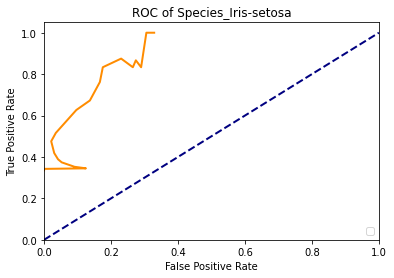

In [37]:
plt.figure()
lw = 2
plt.plot(
    irism2['fpr'],irism2['tpr'],color="darkorange",lw=lw,
    #label="ROC curve (area = %0.2f)" % irism1['th'],
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC of ' + Name[0])
plt.legend(loc="lower right")
plt.show()

## 3.PetalLengthCm

In [38]:
data3c=data2[['PetalLengthCm','Species_Iris-setosa']]
data3c=data3c.sort_values('PetalLengthCm').reset_index(drop=True)
irism3=pd.DataFrame(columns=['fpr','tpr','th'])
th3=list(range(1,100))
irism3['th']=th3
irism3['th']=irism3['th']/10

In [39]:
for i in range(99):
    s=irism3.loc[i,'th']
    tp=len(data3c[data3c['PetalLengthCm']<=s][data3c['Species_Iris-setosa']==1])
    fn=len(data3c[data3c['PetalLengthCm']<=s][data3c['Species_Iris-setosa']==0])
    fp=len(data3c[data3c['PetalLengthCm']>s][data3c['Species_Iris-setosa']==1])
    tn=len(data3c[data3c['PetalLengthCm']>s][data3c['Species_Iris-setosa']==0])
    if fp+tn!=0 and tp+fn!=0:
        irism3.loc[i,'fpr']=fp/(fp+tn)
        irism3.loc[i,'tpr']=tp/(tp+fn)
irism3=irism3.fillna('N')        
irism3=irism3[irism3['fpr']!='N'][irism3['tpr']!='N']
irism3

/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/32883343.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tp=len(data3c[data3c['PetalLengthCm']<=s][data3c['Species_Iris-setosa']==1])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/32883343.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fn=len(data3c[data3c['PetalLengthCm']<=s][data3c['Species_Iris-setosa']==0])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/32883343.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fp=len(data3c[data3c['PetalLengthCm']>s][data3c['Species_Iris-setosa']==1])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/32883343.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tn=len(data3c[data3c['PetalLengthCm']>s][data3c['Species_Iris-setosa']==0])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_272

,fpr,tpr,th
9,0.328859,1.0,1.0
10,0.324324,1.0,1.1
11,0.315068,1.0,1.2
12,0.280576,1.0,1.3
13,0.212598,1.0,1.4
14,0.115044,1.0,1.5
15,0.056604,1.0,1.6
16,0.019608,1.0,1.7
17,0.019608,1.0,1.8
18,0.0,1.0,1.9


In [40]:
irism3['dist']=irism3['fpr']**2+(1-irism3['tpr'])**2
irism3

,fpr,tpr,th,dist
9,0.328859,1.0,1.0,0.108148
10,0.324324,1.0,1.1,0.105186
11,0.315068,1.0,1.2,0.099268
12,0.280576,1.0,1.3,0.078723
13,0.212598,1.0,1.4,0.045198
14,0.115044,1.0,1.5,0.013235
15,0.056604,1.0,1.6,0.003204
16,0.019608,1.0,1.7,0.000384
17,0.019608,1.0,1.8,0.000384
18,0.0,1.0,1.9,0.0


In [41]:
irism3[irism3['dist']==irism3['dist'].min()]
# cutoff value of PetalLengthCm = 1.9~2.9

,fpr,tpr,th,dist
18,0.0,1.0,1.9,0.0
19,0.0,1.0,2.0,0.0
20,0.0,1.0,2.1,0.0
21,0.0,1.0,2.2,0.0
22,0.0,1.0,2.3,0.0
23,0.0,1.0,2.4,0.0
24,0.0,1.0,2.5,0.0
25,0.0,1.0,2.6,0.0
26,0.0,1.0,2.7,0.0
27,0.0,1.0,2.8,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


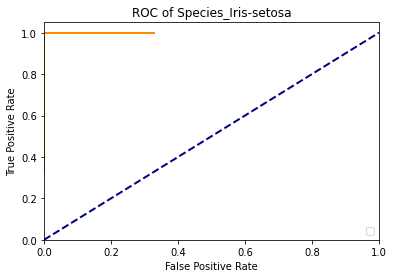

In [42]:
plt.figure()
lw = 2
plt.plot(
    irism3['fpr'],irism3['tpr'],color="darkorange",lw=lw,
    #label="ROC curve (area = %0.2f)" % irism1['th'],
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC of ' + Name[0])
plt.legend(loc="lower right")
plt.show()

## 4.PetalWidthCm

In [43]:
data3d=data2[['PetalWidthCm','Species_Iris-setosa']]
data3d=data3d.sort_values('PetalWidthCm').reset_index(drop=True)
irism4=pd.DataFrame(columns=['fpr','tpr','th'])
th4=list(range(1,100))
irism4['th']=th4
irism4['th']=irism4['th']/10
irism4

,fpr,tpr,th
0,NaN,NaN,0.1
1,NaN,NaN,0.2
2,NaN,NaN,0.3
3,NaN,NaN,0.4
4,NaN,NaN,0.5
...,...,...,...
94,NaN,NaN,9.5
95,NaN,NaN,9.6
96,NaN,NaN,9.7
97,NaN,NaN,9.8


In [44]:
for i in range(99):
    s=irism4.loc[i,'th']
    tp=len(data3d[data3d['PetalWidthCm']<=s][data3d['Species_Iris-setosa']==1])
    fn=len(data3d[data3d['PetalWidthCm']<=s][data3d['Species_Iris-setosa']==0])
    fp=len(data3d[data3d['PetalWidthCm']>s][data3d['Species_Iris-setosa']==1])
    tn=len(data3d[data3d['PetalWidthCm']>s][data3d['Species_Iris-setosa']==0])
    if fp+tn!=0 and tp+fn!=0:
        irism4.loc[i,'fpr']=fp/(fp+tn)
        irism4.loc[i,'tpr']=tp/(tp+fn)
irism4=irism4.fillna('N')        
irism4=irism4[irism4['fpr']!='N'][irism4['tpr']!='N']
irism4

/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/239341276.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tp=len(data3d[data3d['PetalWidthCm']<=s][data3d['Species_Iris-setosa']==1])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/239341276.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fn=len(data3d[data3d['PetalWidthCm']<=s][data3d['Species_Iris-setosa']==0])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/239341276.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fp=len(data3d[data3d['PetalWidthCm']>s][data3d['Species_Iris-setosa']==1])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_27288/239341276.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tn=len(data3d[data3d['PetalWidthCm']>s][data3d['Species_Iris-setosa']==0])
/var/folders/h6/xy43l_w96mn726m0f602gfrm0000gn/T/ipykernel_272

,fpr,tpr,th
0,0.305556,1.0,0.1
1,0.137931,1.0,0.2
2,0.082569,1.0,0.3
3,0.019608,1.0,0.4
4,0.009901,1.0,0.5
5,0.0,1.0,0.6
6,0.0,1.0,0.7
7,0.0,1.0,0.8
8,0.0,1.0,0.9
9,0.0,0.877193,1.0


In [45]:
irism4['dist']=irism4['fpr']**2+(1-irism4['tpr'])**2
irism4

,fpr,tpr,th,dist
0,0.305556,1.0,0.1,0.093364
1,0.137931,1.0,0.2,0.019025
2,0.082569,1.0,0.3,0.006818
3,0.019608,1.0,0.4,0.000384
4,0.009901,1.0,0.5,0.000098
5,0.0,1.0,0.6,0.0
6,0.0,1.0,0.7,0.0
7,0.0,1.0,0.8,0.0
8,0.0,1.0,0.9,0.0
9,0.0,0.877193,1.0,0.015082


In [46]:
irism4[irism4['dist']==irism4['dist'].min()]
# cutoff value of PetalWidthCm = 0.6~0.9

,fpr,tpr,th,dist
5,0.0,1.0,0.6,0.0
6,0.0,1.0,0.7,0.0
7,0.0,1.0,0.8,0.0
8,0.0,1.0,0.9,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


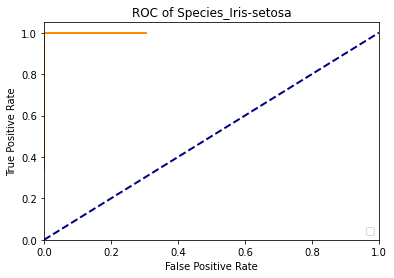

In [47]:
plt.figure()
lw = 2
plt.plot(
    irism4['fpr'],irism4['tpr'],color="darkorange",lw=lw,
    #label="ROC curve (area = %0.2f)" % irism1['th'],
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC of ' + Name[0])
plt.legend(loc="lower right")
plt.show()